In [1]:
import pandas as pd
import re

In [2]:
link_to_drive = "C:/Users/erika/OneDrive/Desktop/" 
file_path = "DOM_Synthesis_Data_Trim_Int.csv"
files_toclean = pd.read_csv(link_to_drive + file_path)
# Rename the column
files_toclean.rename(columns={'Unnamed: 0': 'mz'}, inplace=True)
display(files_toclean)
# Set 'mz' as the index
files_toclean.set_index('mz', inplace=True)
# Sort/reorder by index
files_toclean = files_toclean.sort_index()
abspres = (files_toclean != 0).astype(int)
out_file = 'C:/Users/erika/OneDrive/Desktop/DOM_Synthesis_Data_Trim_Int_cleaned_ECF.csv'

,mz,Behnke2022_2020February20NegESI_Fen_Oe1L_0724_i_L.corems,Behnke2022_2020February20NegESI_Fen_OiL_0724_i.corems,Behnke2022_2020February20NegESI_FW_BL_0724_i.corems,Behnke2022_2020February20NegESI_FW_OaL_0724_i.corems,Behnke2022_2020February20NegESI_FW_Oe2L_0724_i.corems,Behnke2022_2020February20NegESI_Up_BsL_0724_i.corems,Behnke2022_2020February20NegESI_Up_OiL_0724_i.corems,Behnke2022_2020February21NegESI_FW_Spruce_Thru_0630_i.corems,Behnke2022_2020February21NegESI_Up_Hem_thru_0630_i.corems,...,Zhou2022_LWS1.July.corems,Zhou2022_NSH5.July.corems,Zhou2022_SJH4.July.corems,Zhou2022_TH.No.12.corems,Zhou2022_TH.No.16.corems,Zhou2022_TH.No.8.corems,Zhou2022_TH16.August.corems,Zhou2022_TH8.August.corems,Zhou2022_WBH1.July.corems,Zhou2022_YCH2.July.corems
0,289.020032,0.0000,0.0190,0.0202,0.0000,0.0000,0.1412,0.0559,0.3367,0.2846,...,0,0,0,0,0,0,0,0,0,0
1,225.022671,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,3394890,7182650,0,7525246,4067924,6602747,8309971,1980157,4286317,11965611
2,209.045548,0.2793,0.1794,0.2515,1.5360,1.0788,0.8155,0.3793,7.1223,6.7350,...,15127963,16086044,25371477,9269506,4734222,9224356,12258733,14167305,16940420,7143940
3,241.017618,0.0000,0.0782,0.0236,0.0000,0.2102,0.0000,0.0000,0.0000,0.0000,...,5646901,13501323,2284038,16836907,9893490,15548267,22525414,3422460,7468608,35862446
4,225.040458,0.2511,0.1887,0.2574,1.3157,0.8853,0.9223,0.4254,5.0060,4.2487,...,18148187,19259210,24408583,11302287,7282021,13832460,12310756,17842766,20239230,9320893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45863,707.264175,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,2406316,0,0,0,0,0,0,0,0,0
45864,769.253574,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
45865,797.284778,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
45866,244.987381,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,22673293,0,11212837,0,0,0


In [3]:
"""
select_columns_containing: Returns columns containing the specified substring.
remove_columns_and_report: Removes columns based on the 'country.year' pattern, but retains those with the 'dil' keyword. Also, provides a report on how many columns contain "dil" and lists the columns that were removed.
remove_pattern1: Removes the pattern \d{5}\.corems from a string.
remove_after_dil_dill: Removes everything after "dil" or "dill" in column names.
remove_manyfiles_prefix: Removes the "ManyFiles_" prefix from column names.
remove_strings_from_segments: Removes segments from column names that start with specific keywords.
adjust_column_names: Modifies column names to replace '.' with '_' and ensures an underscore after the first string segment.
trim_columns_after_first_number: Trims the column names after the first number.
replace_sweden_with_swed: Replaces the occurrence of "Sweden" with "Swed" in column names."""

'\nselect_columns_containing: Returns columns containing the specified substring.\nremove_columns_and_report: Removes columns based on the \'country.year\' pattern, but retains those with the \'dil\' keyword. Also, provides a report on how many columns contain "dil" and lists the columns that were removed.\nremove_pattern1: Removes the pattern \\d{5}\\.corems from a string.\nremove_after_dil_dill: Removes everything after "dil" or "dill" in column names.\nremove_manyfiles_prefix: Removes the "ManyFiles_" prefix from column names.\nremove_strings_from_segments: Removes segments from column names that start with specific keywords.\nadjust_column_names: Modifies column names to replace \'.\' with \'_\' and ensures an underscore after the first string segment.\ntrim_columns_after_first_number: Trims the column names after the first number.\nreplace_sweden_with_swed: Replaces the occurrence of "Sweden" with "Swed" in column names.'

In [15]:
def select_columns_containing(df, substring):
    """
    Select columns that contain the specified substring.

    Parameters:
    - df: DataFrame to be filtered.
    - substring: The string to look for in column names.

    Returns:
    - DataFrame containing only the columns with the specified substring in their name.
    """
    return df[[col for col in df.columns if substring in col]]

def remove_columns_and_report(df):
    """
    Remove columns based on the 'country.year' pattern, but keep those with 'dil' keyword.
    Produce a report on how many columns contain "dil" and list the columns that were removed.

    Parameters:
    - df: DataFrame to be filtered.

    Returns:
    - DataFrame excluding the undesired columns.
    """

    # Use regular expressions to identify the country and year pattern
    pattern = re.compile(r'([A-Za-z]+)\.(\d{2})')

    # Find the country.year components and store them
    matches = [pattern.search(col) for col in df.columns]
    display(matches)
    country_year_components = [match.group(0) for match in matches if match]

    # Identify the unique country.year components
    unique_components = set(country_year_components)

    # Filter columns
    columns_to_remove = []

    for component in unique_components:
        component_cols = [col for col in df.columns if component in col]
        # Check if any of the columns for this component contains 'dil'
        has_dil = any(['dil' in col for col in component_cols])
        if has_dil:
            columns_to_remove.extend([col for col in component_cols if 'dil' not in col])

    # Remove the identified columns
    df_cleaned = df.drop(columns=columns_to_remove)

    # Report
    dil_columns = [col for col in df.columns if 'dil' in col]
    print(f"Total columns containing 'dil': {len(dil_columns)}")
    print(f"Columns removed: {', '.join(columns_to_remove)}")

    return df_cleaned

def remove_pattern1(column_name):
    return re.sub(r'\d{5}\.corems', '', column_name)

def prefix_dil_if_present(df):
    """
    Add "dil_" to the beginning of column names if they contain "dil".

    Parameters:
    - df: DataFrame to modify.

    Returns:
    - Modified DataFrame with updated column names.
    """

    def prefix_dil(col):
        if 'dil' in col:
            return 'retain_' + col
        else:
            return col

    df.columns = [prefix_dil(col) for col in df.columns]
    return df

def remove_after_dil_dill(df):
    """
    Remove strings that come after "dil" or "dill" in column names of a DataFrame.

    Parameters:
    - df: DataFrame to modify.

    Returns:
    - Modified DataFrame with updated column names.
    """

    def clean_column_name(col):
        if 'dil' in col:
            return col.split('dil', 1)[0]
        else:
            return col

    df.columns = [clean_column_name(col) for col in df.columns]
    return df

def remove_manyfiles_prefix(df):
    """
    Remove the "ManyFiles_" prefix from column names of a DataFrame.

    Parameters:
    - df: DataFrame to modify.

    Returns:
    - Modified DataFrame with updated column names.
    """

    df.columns = [col.replace('ManyFiles_', '') for col in df.columns]
    return df

def remove_strings_from_segments(df):
    """
    Remove segments of column names that start with specific strings.

    Parameters:
    - df: DataFrame to modify.

    Returns:
    - Modified DataFrame with updated column names.
    """

    unwanted_starts = ["MGC", "FTMS", "Lakes", "FJ"]

    def replace_unwanted_segments(col):
        segments = col.split('_')
        filtered_segments = [segment for segment in segments if not any(segment.startswith(unwanted) for unwanted in unwanted_starts)]
        return '_'.join(filtered_segments)

    df.columns = [replace_unwanted_segments(col) for col in df.columns]
    return df


def adjust_column_names(df):
    """
    Adjust the column names based on the criteria:
    1. Replace a '.' with '_'.
    2. Insert an underscore after the first string segment if it's not already present.

    Parameters:
    - df: DataFrame to modify.

    Returns:
    - Modified DataFrame with updated column names.
    """

    def process_colname(col):
        col = col.replace('.', '_')  # Replace '.' with '_'

        # Add underscore after the first string if it's not already present
        match = re.match(r'^([a-zA-Z]+)(?![a-zA-Z_])', col)
        if match:
            prefix = match.group(1)
            col = col.replace(prefix, prefix + "_", 1)  # replace only the first occurrence

        return col

    df.columns = [process_colname(col) for col in df.columns]
    return df

def trim_columns_after_first_number(df):
    """
    Trims the column names of a DataFrame after the first number.

    Parameters:
    - df: Input DataFrame.

    Returns:
    - DataFrame with modified column names.
    """
    def trim_after_first_number(col_name):
        match = re.match(r'^([a-zA-Z_]+?)(\d+)', col_name)
        if match:
            return match.group(1) + match.group(2)
        else:
            return col_name

    df.columns = [trim_after_first_number(col) for col in df.columns]
    return df

def replace_sweden_with_swed(df):
    """
    Replaces the occurrence of "Sweden" with "Swed" in column names.

    Parameters:
    - df: Input DataFrame.

    Returns:
    - DataFrame with modified column names.
    """
    df.columns = [col.replace('Sweden', 'Swed') for col in df.columns]
    return df

def drop_matching_columns_without_prefix(df, prefix="retain_"):
    """
    Drop columns that have a matching counterpart with the specified prefix.

    Parameters:
    - df: DataFrame to be filtered.
    - prefix: The prefix to look for in column names.

    Returns:
    - DataFrame without the columns that have a matching counterpart with the prefix.
    """

    # Identify columns with the prefix
    prefixed_cols = [col for col in df.columns if col.startswith(prefix)]

    # Identify the matching columns without the prefix
    matching_cols_to_drop = [col.replace(prefix, "") for col in prefixed_cols if col.replace(prefix, "") in df.columns]

    return df.drop(columns=matching_cols_to_drop)


def remove_retain_prefix(df):
    """
    Remove the "retain_" prefix from column names of a DataFrame.

    Parameters:
    - df: DataFrame to modify.

    Returns:
    - Modified DataFrame with updated column names.
    """

    df.columns = [col.replace('retain_', '') for col in df.columns]
    return df

def remove_columns_with_substring(df, substring):
    """Remove all columns containing a specific substring."""
    cols_to_remove = [col for col in df.columns if substring in col]
    return df.drop(columns=cols_to_remove)


def merge_and_export(df_original, df_cleaned, filename):
    """Merge two DataFrames and export to CSV."""
    # Remove 'ManyFiles' columns
    df_original = remove_columns_with_substring(df_original, 'ManyFiles')
    # Merge with cleaned columns
    df_combined = pd.concat([df_original, df_cleaned], axis=1)
    # Export to CSV
    df_combined.to_csv(filename, index=False)
    return df_combined

def clean_the_names(df):
    filtered_df = select_columns_containing(df, 'ManyFiles') #290 samples only with J's sample codes
    filtered_df.columns = [remove_pattern1(col) for col in filtered_df.columns]
    dil = prefix_dil_if_present(filtered_df)
    no_dil = remove_after_dil_dill(dil)
    nomanyfiles = remove_manyfiles_prefix(no_dil)
    no_MGC = remove_strings_from_segments(nomanyfiles)
    no_MGC_segment = adjust_column_names(no_MGC)
    df = pd.DataFrame(no_MGC_segment)
    df = trim_columns_after_first_number(df)
    newdf = replace_sweden_with_swed(df)
    second = drop_matching_columns_without_prefix(newdf)
    return second 

def combine_columns(df):
    """
    Combine columns with the same name.
    After combining, if any of the columns has a 1, set the row value to 1, otherwise 0.

    Parameters:
    - df: DataFrame to modify.

    Returns:
    - Modified DataFrame with combined columns.
    """

    # Get unique column names
    unique_cols = df.columns.unique()

    for col in unique_cols:
        # If there are multiple columns with the same name
        if sum(df.columns == col) > 1:
            # Combine columns and check if any of them has a 1
            df[col] = df[col].max(axis=1).astype(int)

            # Drop duplicate columns, keeping only the first occurrence
            df = df.loc[:, ~df.columns.duplicated(keep='first')]

    return df

In [10]:
cleaned_abs_pres= clean_the_names(abspres)
cleaned_relInt= clean_the_names(files_toclean)
DetectedinAll = cleaned_abs_pres.multiply(cleaned_relInt)

In [11]:
result = DetectedinAll.groupby(by=DetectedinAll.columns, axis=1).mean()
cleaned_result = combine_columns(result)
df_cleaned = remove_retain_prefix(cleaned_result)
display(df_cleaned)

,Austria_01,Austria_02,Austria_03,Austria_04,Austria_05,Austria_06,Austria_07,Croatia_01,Croatia_02,Croatia_03,...,Italy_06,MasterMix_,Norway_07,Norway_14,Swed_04,Swed_16,Swed_25,Swed_302,Swed_35,Swed_45
mz,,,,,,,,,,,,,,,,,,,,,
200.002244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200.017565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200.020069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200.020940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200.035327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799.391773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
799.405835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
799.423433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df= merge_and_export(files_toclean, df_cleaned, out_file)

<AxesSubplot: >

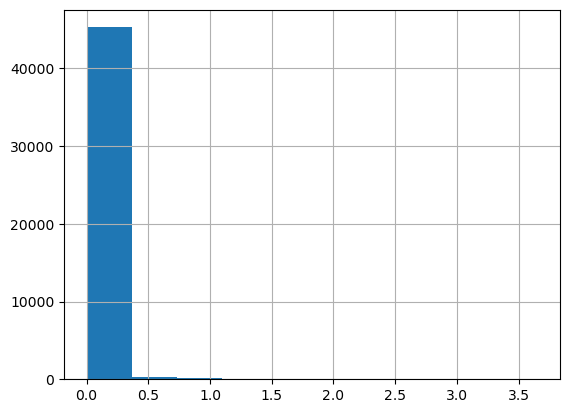

In [21]:
df.iloc[:, 1].hist()